In [1]:
#
# We import matplotlib for plotting...
import matplotlib.pyplot as plt
# ... and make sure the plots are shown inline
%matplotlib inline
# We import numpy for numerical computations
import numpy as np
# We import pandas for data analysis
import pandas as pd
# From pandas we will neeed series and data frames
from pandas import Series, DataFrame
# We import statsmodels for Statistical modelling
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
# We use patsy for statistical models in Python
from patsy import dmatrices
# We import skilearn for Machine learning
from sklearn import datasets, svm


## I. Preparatory steps: Reading and cleaning

We read training data from file train.csv, located in the data folder and inspect what the data frame looks like

In [2]:
# We read csv file and load it to a data frame, df
df = pd.read_csv("data/train.csv") 

In [3]:
# We explore the data frame and its shape
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [4]:
# Let's see what the shape of the data frame is
df.shape

(891, 12)

In [5]:
# Let's find out what the number of non-NaN we have in each column
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

From the previous instruction we notice that the number of non-NaN's in 'Cabin' column is very low compared with the total number of values. Since we have a large number of NaN's in this column, we will eliminate it

In [6]:
df = df.drop(['Cabin'], axis=1)

In [7]:
# Let's explore the number of null cells in each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

We notice that the 'Age' column has a considerable fraction of null cells (177/891 ~ 0.20). We could also drop of the coumn or replace the null cells with some other number. We could, for instance, replace them with the age mean. Let's not worry about it by now but keep in mind in case we need to make extensive use of that feature.

From the previous exploration of the data frame we also notice the column 'Tikcet' has alphanumerical entries that we do not know how to interpret. For the time being, let's drop that column as well

In [8]:
df.Ticket.head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

In [9]:
df = df.drop(['Ticket'], axis=1)

Let's look again at the number of non-NaN values in this reduced data frame

In [10]:
# Let's find out what the number of non-NaN we have in each column
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Fare           891
Embarked       889
dtype: int64

We can now drop NaN's in our data frame. Because .dropna() removes an observation from our data even if it only has 1 NaN in one of the features, it would have removed most of our dataset if we had not dropped the ticket and cabin features first.

In [11]:
# Let's drop NaN's
df = df.dropna()

In [12]:
# Let's find out, once more, what the number of non-NaN we have in each column
df.count()

PassengerId    712
Survived       712
Pclass         712
Name           712
Sex            712
Age            712
SibSp          712
Parch          712
Fare           712
Embarked       712
dtype: int64

In [13]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,30.0708,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,16.7000,S


## II. Basic graphic analysis

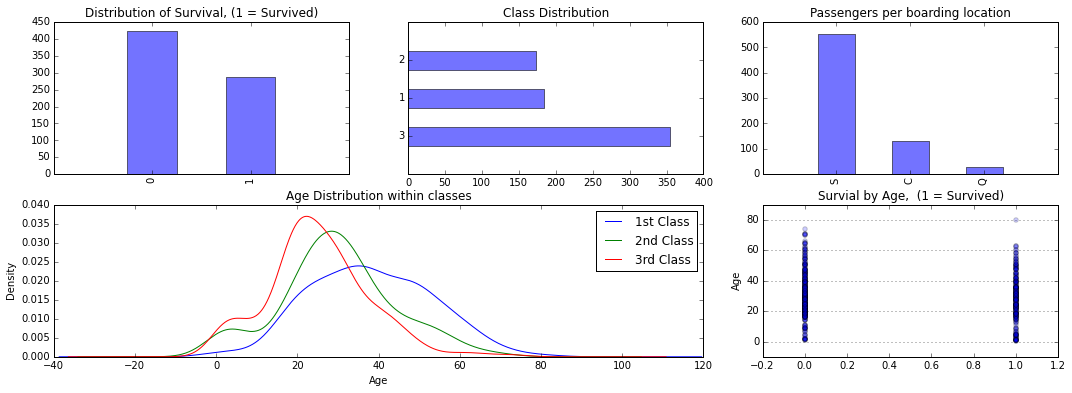

In [14]:
# We first spaecify the parameters of our plots
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

# We proceed to do some graphs shaped together 
# in a grid of graphs.
# For this we make use of subplot2grid from MatPlotLib
# http://matplotlib.org/users/gridspec.html

# We will do a grid of graphs with shape (2,3)

# ################################################################
#
# ---- Frist graph in grid -- located at position (0,0) ----
# 
#    Bar plot of distribution of survival

# In the following command:
#  (2,3) represents the geometry of the grid 
#  (0,0) location of the subplot
# ax00 is the cell reserved for our first plot
ax00 = plt.subplot2grid((2,3),(0,0))
#
# For this first subplot we will show a bar graph of 
# those who surived vs those who did not.  
# Taking the data frame df, we grab the 'Survived' column, df.Survived
# and obtain the number of 1's (survived) and 0's (did not survived)
# df.Survived.value_counts()
#
# With the values obtained in df.Survived.value_counts() we plot
# a bar plot with the parameters specified above
# df.Survived.value_counts().plot
df.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
# We now set the margins for this first plot
ax00.set_xlim(-1, 2)
# We finally set a title in the first graph
plt.title("Distribution of Survival, (1 = Survived)")    
#
# ---- end of first graph ----
#
# ################################################################
#
# ################################################################
#
#
# ---- Second graph in grid -- located at position (0,1) ----
#
#    Bar plot of Class distribution
#
# We proceed in a similar fashion as before
#
ax01 = plt.subplot2grid((2,3),(0,1))
# This time we use the 'Pclass' column to do a horizontal bar plot (barh)
df.Pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
# We set the y-limits in the plot
# Notice how the largest value in the interval is determined by the
# count of values in the column
ax01.set_ylim(-1, len(df.Pclass.value_counts()))
# We finally set the title of the plot
plt.title("Class Distribution")
#
# ---- end of second graph ----
#
# ################################################################
#


# ################################################################
#
#
# --- Third graph in the grid -- located at position (0,2) ---
#
#   Bar plot of Passengers per boarding location
#
# We proceed as before
#
# We set this plot at (0,2)
ax02 = plt.subplot2grid((2,3),(0,2))
# We utilize the 'Embarked' column to do a 'bar' plot
df.Embarked.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
# Set the limits along the x-axis. Notice once more how the larger value 
# in the interval is determined by the length of df.Embarked.value_counts()
ax02.set_xlim(-1, len(df.Embarked.value_counts()))
# We finally specify the title of the graph
plt.title("Passengers per boarding location")
#
# ---- end of third graph ----
#
# ################################################################
#


# ################################################################
#
#
# --- Fourth graph in the grid -- located at position (1,0) ---
#
#   Plot of distribution of classes
#
# We proceed as before
# Here we notice that the plot spans two columns, reason why we set colspan = 2
plt.subplot2grid((2,3),(1,0), colspan = 2)
# plots a kernel density estimate of the subset of the 1st class passanges's age
df.Age[df.Pclass == 1].plot(kind='kde')    
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')
# We add x-axis lable
plt.xlabel("Age")    
# Set title
plt.title("Age Distribution within classes")
# And set legend for the graph; legend is set in the 'best' possible location (loc)
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 
#
# ---- end of fourth graph ----
#
# ################################################################
#


# ################################################################
#
#
# --- Fifth graph in the grid -- located at position (1,2) ---
#
#     Scatter plot of survival by age
#
# We proceed in a similar fashion as before
#
ax12 = plt.subplot2grid((2,3),(1,2))
#
# This time we do a scatter plot 
ax12.scatter(df.Survived, df.Age, alpha=alpha_scatterplot)
# sets the y axis lable
plt.ylabel("Age")
# formats the grid line style for our graph                          
plt.grid(b=True, which='major', axis='y') 
# and set the title
plt.title("Survial by Age,  (1 = Survived)")
#
#
#  --- end of fifth graph
#
# ################################################################



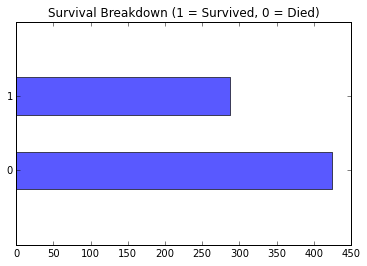

In [16]:
# We now do a plot showing survival breakdown
# We first set figure size 
plt.figure(figsize=(6,4))
# We generate figure and axis
fig, ax = plt.subplots()
# We will do a bar plot (horizontal bars)
# using the 'Survived' column, df.Survived, and do value count,
# df.Survived.value_counts() to do the split between people who survived
# and who did not.
df.Survived.value_counts().plot(kind='barh', color="blue", alpha=.65)
# We set the y-axis limits, and once again the maximum value is 
# given by the length of df.Survived.value_counts()
ax.set_ylim(-1, len(df.Survived.value_counts())) 
# We finally set a title for the plot
plt.title("Survival Breakdown (1 = Survived, 0 = Died)")

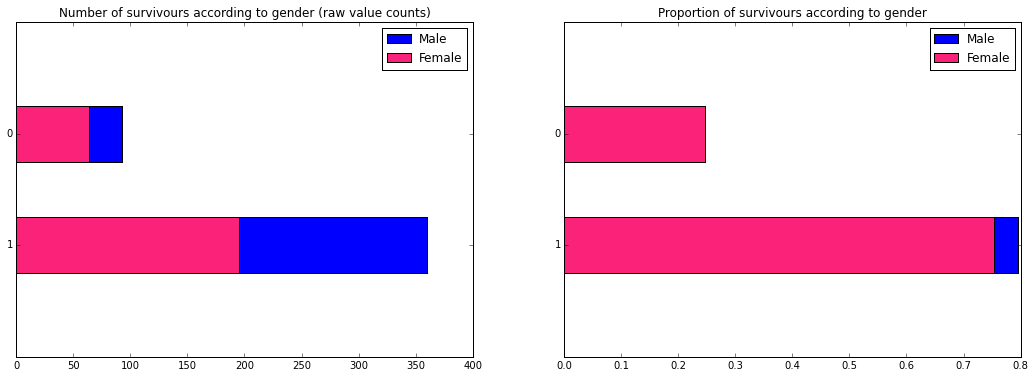

In [17]:
# We set figure with the specified size
fig = plt.figure(figsize=(18,6))
# We will create a plot of two subsets, male and female, of the survived variable.
# To do so we make use of add_subplot
# http://matplotlib.org/api/figure_api.html
# http://stackoverflow.com/questions/3584805/in-matplotlib-what-does-the-argument-mean-in-fig-add-subplot111

#
# For this purpouse we create 1 X 2 grid of plots.

# Here 121 means a "1 X 2" grid of plots and the last "1" means plot number 1 in the grid
ax1 = fig.add_subplot(121)
#
# We now call value_counts() so it can be easily plotted as a bar graph. 
# Remember that 'barh' means horizontal bar graph
# First for male...
df.Survived[df.Sex == 'male'].value_counts().plot(kind='barh',label='Male')
# ... then for female
df.Survived[df.Sex == 'female'].value_counts().plot(kind='barh', color='#FA2379',label='Female')
# We now set the limits in the y-axis for the first plot
ax1.set_ylim(-1, 2) 
# Set title ...
plt.title("Number of survivours according to gender (raw value counts) ")
#  ... and legend (in the best possible location)
plt.legend(loc='best')

# We now proceed with the second plot in the 1X2 grid of plots
# We recall that "12" means a 1 X 2 grid and the last "2" means plot number 2
ax2 = fig.add_subplot(122)
# We adjust the previous graphs to display the proportions of survival by gender
(df.Survived[df.Sex == 'male'].value_counts()/float(df.Sex[df.Sex == 'male'].size)).plot(kind='barh',label='Male')  
(df.Survived[df.Sex == 'female'].value_counts()/float(df.Sex[df.Sex == 'female'].size)).plot(kind='barh', color='#FA2379',label='Female')
# Set the limits
ax2.set_ylim(-1, 2)
# And set title
plt.title("Proportion of survivours according to gender")
# Set position of legend
plt.legend(loc='best')

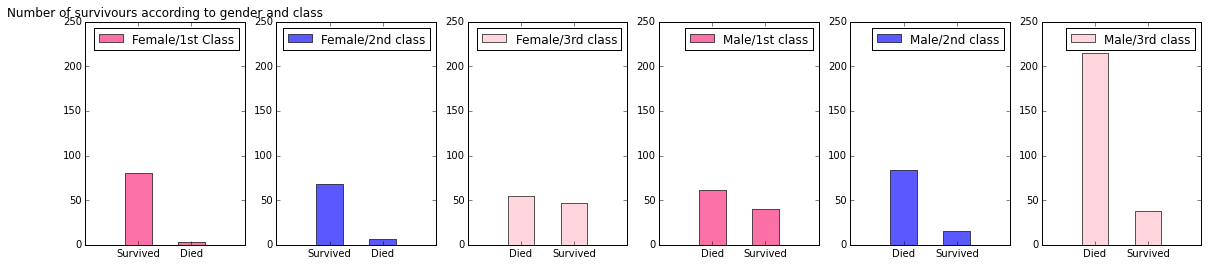

In [19]:
# We proceed as before
fig = plt.figure(figsize=(20,4), dpi=1800)
alpha_level = 0.65

# We create an additional subset with in the gender subset 
# we created for the survived variable. Here we do a bar graph for each gender/class pair.
# Since we will have six plots we have a now a 1 X 6 grid
# 
# For the first plot we show Female/First Class
# This corresponds to plot number "1" of the "1 X 6" grid
ax1=fig.add_subplot(161)
# In our data frame, df, we select the column Survived (remember it has ones or zeroes)
# and subset it according to female gender (df.Sex) and first class (df.Pclass)
# and count its values .value_counts
female_first_class = df.Survived[df.Sex == 'female'][df.Pclass == 1].value_counts()
# We select a 'bar' plot, set the label and color
female_first_class.plot(kind='bar', label='Female/1st Class', color='#FA2479', alpha=alpha_level)
# We set the labels on the the columns; rotation gives how many degrees the labels (text)
# are tilted with respect the horizontal line
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
# We finally set the x-axis limits of the plot
ax1.set_xlim(-1, len(female_first_class))
# We choose the title...
plt.title("Number of survivours according to gender and class")
# ... and set the location of the legend
plt.legend(loc='best')

# For the second plot we show Female/Second class
# Recall that 16 means "1 X 6" grid  and "2" refers to the second plot of the grid
# The use of 'sharey' indicates this plots shares the y axis with the previous plot 
ax2=fig.add_subplot(162, sharey=ax1)
# Similarly: choose female, second class
female_second_class = df.Survived[df.Sex == 'female'][df.Pclass == 2].value_counts()
# Set bar type of plot, add label and set the color of the bars
female_second_class.plot(kind='bar', label='Female/2nd class', color='blue', alpha=alpha_level)
# Add labels to the x-axis for the bars; no rotation done
ax2.set_xticklabels(["Survived","Died"], rotation=0)
# Set x-axis limits...
ax2.set_xlim(-1, len(female_second_class))
# ... and location of legend
plt.legend(loc='best')


# For the thirs plot we show Female/Third class
# Recall that 16 means "1 X 6" grid  and "3" refers to the third plot of the grid
# The use of 'sharey' indicates this plots shares the y axis with the previous plot 
ax3=fig.add_subplot(163, sharey=ax1)
# Similarly: choose female, third class
female_third_class = df.Survived[df.Sex == 'female'][df.Pclass == 3].value_counts()
# Select type of plot, label and color
female_third_class.plot(kind='bar', label='Female/3rd class', color='pink', alpha=alpha_level)
# Choose the lables on the x-axis ticks; labels under the bars, no text rotation
ax3.set_xticklabels(["Died","Survived"], rotation=0)
# Set limits in the plot x-axis ...
ax3.set_xlim(-1, len(female_third_class))
# ... and location of the legend
plt.legend(loc='best')

# For the next three plots we procedd as before; I trust the last two follow naturally from
# the first three.
ax4=fig.add_subplot(164, sharey=ax1)
male_first_class = df.Survived[df.Sex == 'male'][df.Pclass == 1].value_counts()
male_first_class.plot(kind='bar', label='Male/1st class',color='#FA2479', alpha=alpha_level)
ax4.set_xticklabels(["Died","Survived"], rotation=0)
ax4.set_xlim(-1, len(male_first_class))
plt.legend(loc='best')

ax5=fig.add_subplot(165, sharey=ax1)
male_second_class = df.Survived[df.Sex == 'male'][df.Pclass == 2].value_counts()
male_second_class.plot(kind='bar', label='Male/2nd class', alpha=alpha_level, color='blue')
ax5.set_xticklabels(["Died","Survived"], rotation=0)
ax5.set_xlim(-1, len(male_second_class))
plt.legend(loc='best')

ax6=fig.add_subplot(166, sharey=ax1)
male_third_class = df.Survived[df.Sex == 'male'][df.Pclass == 3].value_counts()
male_third_class.plot(kind='bar', label='Male/3rd class', alpha=alpha_level, color='pink')
ax6.set_xticklabels(["Died","Survived"], rotation=0)
ax6.set_xlim(-1, len(male_third_class))
plt.legend(loc='best')

## III. Some machine learning

In [18]:
# We first set the formula we will use for our training
# Recall that "~" sign means "=" sign.
# The features of our dataset are written as a formula to predict survived. 
# In the formula C() indicates that the variable is categorical.
formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp  + C(Embarked)' 
# We create a results dictionary to hold our regression results for easy analysis        
results = {} 

### III.a. Logistic regression

In [19]:
# We create a regression freindly dataframe using patsy's dmatrices function
# For reference, check:
# http://patsy.readthedocs.org/en/latest/API-reference.html
y,x = dmatrices(formula, data=df, return_type='dataframe')

# We instantiate our proposed model; logistic regression from
# Python's StatisticalsModels library 
# http://statsmodels.sourceforge.net/devel/examples/generated/example_discrete.html
model = sm.Logit(y,x)

# We now fit our model to the training data
model_fit = model.fit()

Optimization terminated successfully.
         Current function value: 0.444388
         Iterations 6


In [20]:
# We save the result to the dictionary created; this is done for outputing predictions later
results['Logit'] = [model_fit, formula]
# Let's print the summary of the regression
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      704
Method:                           MLE   Df Model:                            7
Date:                Sat, 26 Sep 2015   Pseudo R-squ.:                  0.3414
Time:                        22:59:47   Log-Likelihood:                -316.40
converged:                       True   LL-Null:                       -480.45
                                        LLR p-value:                 5.992e-67
====================================================================================
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            4.5423      0.474      9.583      0.000         3.613     5.471
C(Pclass)[T.2]      -1.2673      0.299     -4.245      0.000        -1.852    -0.682
C(Pclass)[T.3]      -2.4966      0.296     -8.422      0.000        -3.078    -1.916
C(Sex)[T.male]      -2.6239      0.218    -12.060      0.000        -3.050    -2.197
C(Embarked)[T.Q]    -0.8351      0.597     -1.398      0.162        -2.006     0.335
C(Embarked)[T.S]    -0.4254      0.271     -1.572      0.116        -0.956     0.105
Age                 -0.0436      0.008     -5.264      0.000        -0.060    -0.027
SibSp               -0.3697      0.123     -3.004      0.003        -0.611    -0.129
====================================================================================
"""

We now wish to show in a plot a comparison between predicted and actual values

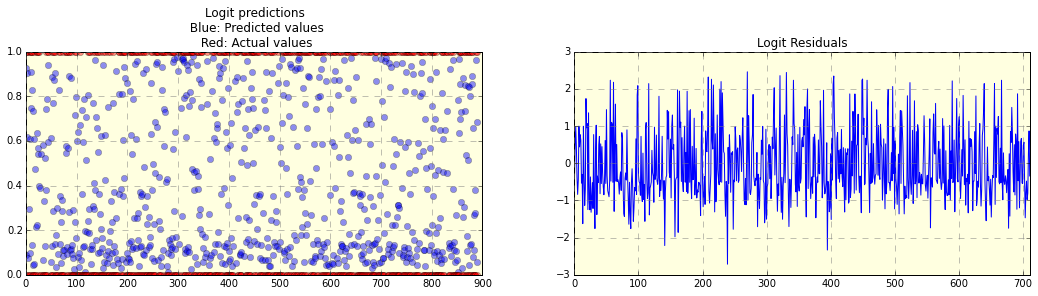

In [21]:
# We now wish to compare our predictions with the actual values
# Let's plot Predictions Vs Actual
#
#
# We set size of figure
plt.figure(figsize=(18,4));
# We set a "1 X 2" grid and add a plot in position number 1, "1"
# We also set the background color to light yellow
plt.subplot(121,axisbg="lightyellow")
# We now generate predictions from our fitted model
# The following command indicates that we get predicted y, y_pred,
# as predictions of our features collected in x 
y_pred = model_fit.predict(x)
# We do the actual plotting
# Notice that in the same plot we show the 
# set of predicted pairs (x.index,y_pred) as well as the 
# set of actual pairs (x.index,y)
# The former ones are shown in blue (bo) while the latter ones in red (ro)
# The "o" in ro and bo indicates spheres/points
# Notice that the latter ones have values of either 1 or 0, as it should
plt.plot(x.index, y_pred, 'bo', x.index, y, 'ro', alpha=.45);
# We add a grid of grey-dashed lines
plt.grid(color='grey', linestyle='dashed')
# Finally, we add a title to the plot
plt.title('Logit predictions \n Blue: Predicted values \n Red: Actual values');

# Let's now plot residuals...
#ax2 = plt.subplot(122, axisbg="#DBDBDB")
# We add the other sub-plot in the second (2) position of the "1 X 2" grid
ax2 = plt.subplot(122, axisbg="lightyellow")
# Plot residuals by calling .resid_dev with lines in blue, 'b-'
# The simbol '-' in 'b-' indicates lines
plt.plot(model_fit.resid_dev, 'b-')
# We add a grey-dashed grid
plt.grid(color='grey', linestyle='dashed')
# Set the limits of the plot...
ax2.set_xlim(-1, len(model_fit.resid_dev))
# ... and add title
plt.title('Logit Residuals');

Let's now do a graphical analysis of our predictions

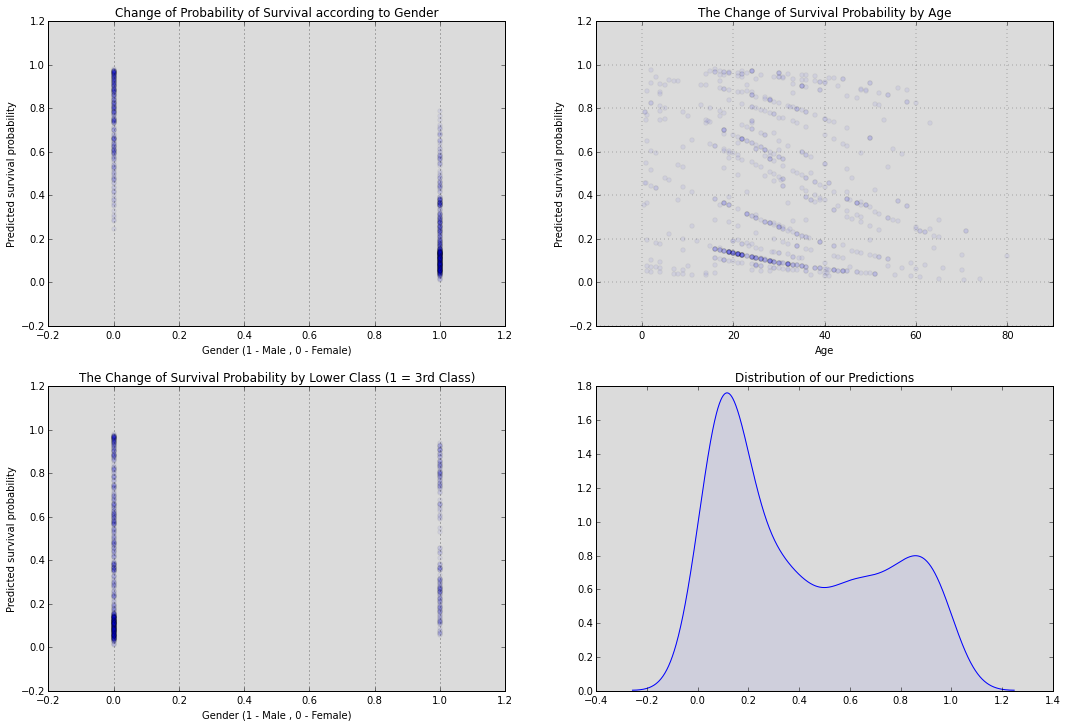

In [24]:
#
# We first specify the size and dpi of our figure
fig = plt.figure(figsize=(18,12), dpi=1600)
a = .05

# 
# Similar to previous cases we will genearate a grid of plots
# In this case it will be a 2 X 2 grid.
# 
# ============================================== #
#
#               FIRST PLOT
#              Scatter plot 
#   Change of Survival Probability by Gender
#             
#
# ============================================== #
#
# We first set the background of the plot
#
fig.add_subplot(221, axisbg="#DBDBDB")
#
# This will be a a scatter plot showing the predicted survival probability
plt.scatter(x['C(Sex)[T.male]'], y_pred , alpha=a)
#plt.scatter(y_pred,x['C(Sex)[T.male]'] , alpha=a)
# We add a grid to the plot...
plt.grid(b=True, which='major', axis='x')
# ... as well as labels for the X- and Y-axis
plt.ylabel("Predicted survival probability")
plt.xlabel("Gender (1 - Male , 0 - Female)")
# Finally we include a title to it
plt.title("Change of Probability of Survival according to Gender")


# 
# ============================================== #
#
#               SECOND PLOT
#              Scatter plot 
#   Change of Survival Probability by Age
#             
#
# ============================================== #
#
# As we can see, the structure of the commands is quite similar to the one above
#
fig.add_subplot(222, axisbg="#DBDBDB")
plt.scatter(x.Age,y_pred , alpha=a)
plt.grid(True, linewidth=0.25)
plt.ylabel("Predicted survival probability")
plt.xlabel("Age")
plt.title("The Change of Survival Probability by Age")


# 
# ============================================== #
#
#               THIRD PLOT
#              Scatter plot 
#   Change of Survival Probability by Age
#             
#
# ============================================== #
#
# As we can see, the structure of the commands is quite similar to the one above
#
fig.add_subplot(223, axisbg="#DBDBDB")
plt.scatter(x['C(Pclass)[T.2]'] , y_pred, alpha=a)
plt.ylabel("Predicted survival probability")
plt.xlabel("Gender (1 - Male , 0 - Female)")
plt.grid(b=True, which='major', axis='x')
plt.title("The Change of Survival Probability by Lower Class (1 = 3rd Class)")



fig.add_subplot(224, axisbg="#DBDBDB")
kde_res = KDEUnivariate(y_pred)
kde_res.fit()
plt.plot(kde_res.support,kde_res.density)
plt.fill_between(kde_res.support,kde_res.density, alpha=a)
plt.title("Distribution of our Predictions")



#print x

In [25]:
test_data = pd.read_csv("data/test.csv")

In [26]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [27]:
test_data['Survived'] = 1.23

In [28]:
results 

{'Logit': [<statsmodels.discrete.discrete_model.BinaryResultsWrapper at 0x119949cd0>,
  'Survived ~ C(Pclass) + C(Sex) + Age + SibSp  + C(Embarked)']}

In [29]:
# Create an acceptable formula for our machine learning algorithms
formula_ml = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Parch + C(Embarked)'

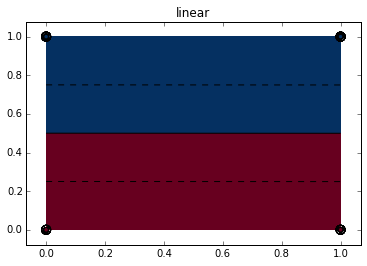

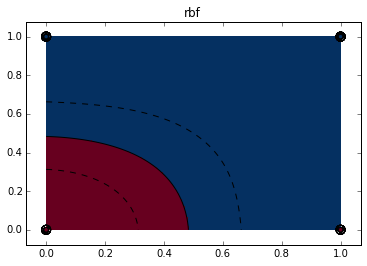

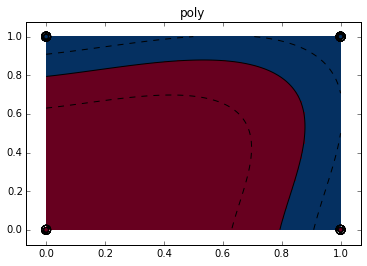

In [30]:
# set plotting parameters
plt.figure(figsize=(8,6))

# create a regression friendly data frame
y, x = dmatrices(formula_ml, data=df, return_type='matrix')

# select which features we would like to analyze
# try chaning the selection here for diffrent output.
# Choose : [2,3] - pretty sweet DBs [3,1] --standard DBs [7,3] -very cool DBs, [3,6] -- very long complex dbs, could take over an hour to calculate! 
feature_1 = 2
feature_2 = 3

X = np.asarray(x)
X = X[:,[feature_1, feature_2]]  


y = np.asarray(y)
# needs to be 1 dimenstional so we flatten. it comes out of dmatirces with a shape. 
y = y.flatten()      

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)

X = X[order]
y = y[order].astype(np.float)

# do a cross validation
nighty_precent_of_sample = int(.9 * n_sample)
X_train = X[:nighty_precent_of_sample]
y_train = y[:nighty_precent_of_sample]
X_test = X[nighty_precent_of_sample:]
y_test = y[nighty_precent_of_sample:]

# create a list of the types of kerneks we will use for your analysis
types_of_kernels = ['linear', 'rbf', 'poly']

# specify our color map for plotting the results
color_map = plt.cm.RdBu_r

# fit the model
for fig_num, kernel in enumerate(types_of_kernels):
    clf = svm.SVC(kernel=kernel, gamma=3)
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=color_map)

    # circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none', zorder=10)
    
    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=color_map)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
               levels=[-.5, 0, .5])

    plt.title(kernel)
    plt.show()

In [31]:
# Here you can output which ever result you would like by changing the Kernel and clf.predict lines
# Change kernel here to poly, rbf or linear
# adjusting the gamma level also changes the degree to which the model is fitted
clf = svm.SVC(kernel='poly', gamma=3).fit(X_train, y_train)                                                            
y,x = dmatrices(formula_ml, data=test_data, return_type='dataframe')

# Change the interger values within x.ix[:,[6,3]].dropna() explore the relationships between other 
# features. the ints are column postions. ie. [6,3] 6th column and the third column are evaluated. 
res_svm = clf.predict(x.ix[:,[6,3]].dropna()) 

res_svm = DataFrame(res_svm,columns=['Survived'])
res_svm.to_csv("data/Output_svm_poly_63_g10.csv")
#res_svm.to_csv("data/output/svm_poly_63_g10.csv") # saves the results for you, change the name as you please. 

In [32]:
# import the machine learning library that holds the randomforest
import sklearn.ensemble as ske

# Create the random forest model and fit the model to our training data
y, x = dmatrices(formula_ml, data=df, return_type='dataframe')
# RandomForestClassifier expects a 1 demensional NumPy array, so we convert
y = np.asarray(y).ravel()
#instantiate and fit our model
results_rf = ske.RandomForestClassifier(n_estimators=100).fit(x, y)
#print x
print results_rf
# Score the results
score = results_rf.score(x, y)
print "Mean accuracy of Random Forest Predictions on the data was: {0}".format(score)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Mean accuracy of Random Forest Predictions on the data was: 0.945224719101
